In [1]:
from scipy.sparse import csr_matrix
import polars as pl
import implicit
import matplotlib.pyplot as plt

In [4]:
train = pl.scan_parquet("../train_interactions.parquet")

In [6]:
train = train.with_columns(weight=pl.col("like") - pl.col("dislike"))
train

In [8]:
train = train.select("user_id", "item_id","timespent", "share", "weight")
train

In [10]:
train = train.collect()
train

user_id,item_id,timespent,share,weight
u32,u32,u8,u8,u8
3810,138979,6,0,0
101874,331160,6,0,0
150332,73709,11,0,0
4982,189745,5,0,0
149601,289643,1,1,0
…,…,…,…,…
10718,93558,7,0,0
119164,60206,60,0,0
171518,99323,70,0,0


In [14]:
train = train.sql("""
  SELECT * 
  FROM self
  WHERE weight <= 1
""")
train['weight'].value_counts()

weight,count
u8,u32
1,6788267
0,138821753


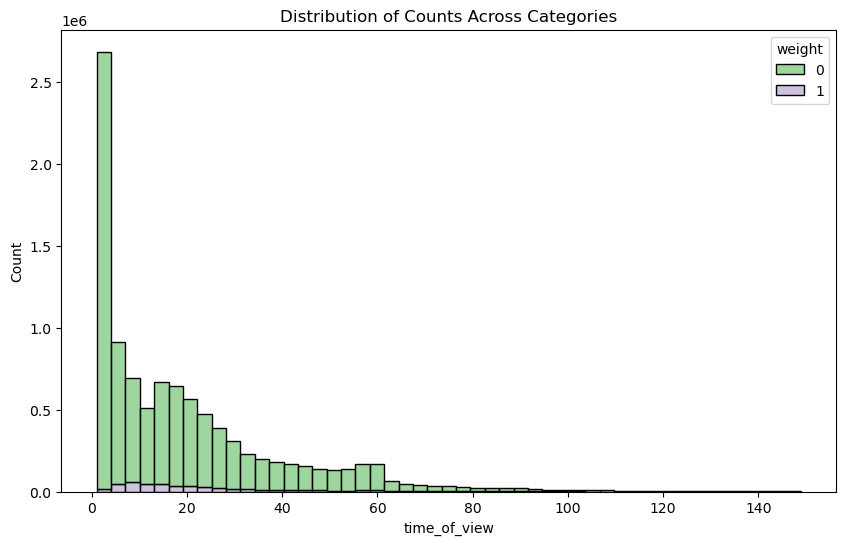

In [15]:
import seaborn as sns

# Построение гистограммы с использованием seaborn
plt.figure(figsize=(10, 6))
sns.histplot(x='timespent', data = train.sample(9999999).sql("""
  SELECT * FROM self WHERE timespent < 150 ORDER BY timespent DESC 
"""), binwidth=3, hue = 'weight', palette = 'Accent', multiple="stack")

plt.xlabel("time_of_view")
plt.ylabel("Count")
plt.title("Distribution of Counts Across Categories")
plt.show()

In [18]:
items_meta = pl.read_parquet("items_meta.parquet")
users_meta = pl.read_parquet("users_meta.parquet")
n_items = items_meta["item_id"].max() + 1
n_users = users_meta["user_id"].max() + 1

#нужно посчитать соотношение лайков дизлайков у каждого пользователя и видео

In [78]:
#train = csr_matrix((train["weight"], 
                   # (train["user_id"].to_numpy(), 
                   # train["item_id"].to_numpy())),
                   #shape=(n_users, n_items))

In [79]:
#model = implicit.als.AlternatingLeastSquares(factors=16, 
                                           #  iterations=10, 
                                           #  regularization=1, 
                                           #  alpha=100,
                                           #  calculate_training_loss=True)
#model.fit(train)

In [80]:
#test_pairs = pl.read_csv('test_pairs.csv')
#test_pairs

In [81]:
#als_predict = (model.user_factors[test_pairs['user_id']] * 
#               model.item_factors[test_pairs['item_id']]).sum(axis=1)

In [82]:
#test_pairs.with_columns(predict=als_predict).write_csv('sample_submission.csv')